In [1]:
from pl_packages import *
from tail_functions import *
from plotting_functions import *

In [2]:
#Font sizes and labels for plots
font_sizes=[15,15,15,15,15]
label_arr0=[r'$w$',r'$\mathbb{P}(W>w)$',font_sizes,0] #no legend
label_arr1=[r'$w$','',font_sizes,1] #legend

#directory to save plots
direc_save ='/home/samuel/Documents/other/other_p/research/power_laws/pl_code/plots/' 

In [3]:
b=2
x_m=10
n=10**3

pareto_sample=pareto.rvs(b, scale=x_m, size=n)

In [4]:
%%time
#Linear regression fit - zero intercept
#https://math.stackexchange.com/questions/3297060/linear-regression-without-intercept-formula-for-slope

pl_lr_fit_vec=pl_reg_fit(pareto_sample,x_m)

print(pl_lr_fit_vec[2],pl_lr_fit_vec[3])

99.86339031949196 1.999406306081732
CPU times: user 4 ms, sys: 4 ms, total: 8 ms
Wall time: 3.49 ms


In [5]:
%%time
#Non-linear regression fit, one parameter free

b0=1

pl_nlr_fit_vec=pl_nlr_fit(pareto_sample,b0,x_m)

print(pl_nlr_fit_vec[2],pl_nlr_fit_vec[3])

117.94580926689852 2.0716825145764752
CPU times: user 0 ns, sys: 8 ms, total: 8 ms
Wall time: 6.45 ms


In [6]:
%%time
#MLE fit
pl_mle_fit_vec=get_power_law_fit(pareto_sample,x_m)

print(pl_mle_fit_vec[2],pl_mle_fit_vec[3])

114.25234646012161 2.057865128166118
CPU times: user 4 ms, sys: 4 ms, total: 8 ms
Wall time: 6.22 ms


In [7]:
x,y=tail(pareto_sample)

<module 'matplotlib.pyplot' from '/home/samuel/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

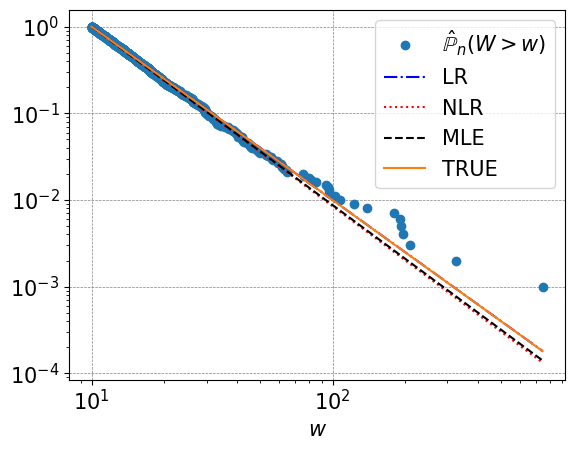

In [8]:
plt.loglog(x,y,'o',label='$\hat{\mathbb{P}}_n(W>w)$')
plt.loglog(pl_lr_fit_vec[0],pl_lr_fit_vec[1],color='blue',linestyle='-.',label='LR')
plt.loglog(pl_nlr_fit_vec[0],pl_nlr_fit_vec[1],color='red',linestyle=':',label='NLR')
plt.loglog(pl_mle_fit_vec[0],pl_mle_fit_vec[1],color='black',linestyle='--',label='MLE')
plt.loglog(x,(x_m/x)**b,label='TRUE')
add_labels(plt,*label_arr1)

In [3]:
#Get sample of size n from piecewise RV exponential then power law with parameters w_m and beta=b
def get_sample_pl_exp(x_m,b,n):
    p_n=uniform.rvs(size=n)
    s=[]
    for i in range(n):
        p=p_n[i]
        if p <= np.exp(-b):
            x=x_m*np.exp(-1)*p**(-1/b)
        else:
            x=x_m/b*np.log(1/p)
        s.append(x)
    s=np.asarray(s,float)
    return s

#Get sample of size n from Lomax or Pareto type II RV with parameters lambda=l and beta=b

def get_sample_Lomax(l,b,n):
    p_n=uniform.rvs(size=n)
    return l*(p_n**(-1/b)-1)  

# def get_pl_fits_pl_exp(x_m,b,n):
#     s=get_sample_pl_exp(x_m,b,n)
#     s_pl=s1[np.where(s1>x_m)]
#     s_mle_fit=get_power_law_fit1(s1,x_m)
#     s_pl_mle_fit=get_power_law_fit1(s1_pl,x_m)
#     s_lr_fit=pl_reg_fit1(s1,x_m,g)
#     s_pl_lr_fit=pl_reg_fit1(s1_pl,x_m,g)
#     x_mle_fit=s_mle_fit[0]
#     y_mle_fit=s_mle_fit[1]
#     x_lr_fit=s_lr_fit[0]
#     y_lr_fit=s_lr_fit[1]
#     x_pl_mle_fit=s_pl_mle_fit[0]
#     y_pl_mle_fit=s_pl_mle_fit[1]
#     x_pl_lr_fit=s_pl_lr_fit[0]
#     y_pl_lr_fit=s_pl_lr_fit[1]
#     beta_fit_mle=s_mle_fit[3]
#     beta_fit_lr=s_lr_fit[3]
#     v=[x_mle_fit,y_mle_fit,x_pl_mle_fit,y_pl_mle_fit]
#     return x_mle_fit,

In [10]:
%%time
n=10**4
b=1.5
x_m=20
l=20

s1=get_sample_pl_exp(x_m,b,n)
s2=get_sample_Lomax(l,b,n)

er,x_m1=x_min_pred(s2)
print(x_m1)

s1_pl=s1[np.where(s1>x_m)]
s2_pl=s2[np.where(s2>x_m1)]

n1=len(s1_pl)
n2=len(s2_pl)

print(n1,n2)

s1_mle_fit=get_power_law_fit1(s1,x_m)
s2_mle_fit=get_power_law_fit1(s2,x_m1)
s1_pl_mle_fit=get_power_law_fit1(s1_pl,x_m)
s2_pl_mle_fit=get_power_law_fit1(s2_pl,x_m1)

g=1.65
s1_lr_fit=pl_reg_fit1(s1,x_m,g)
s2_lr_fit=pl_reg_fit1(s2,x_m1,g)
s1_pl_lr_fit=pl_reg_fit1(s1_pl,x_m,g)
s2_pl_lr_fit=pl_reg_fit1(s2_pl,x_m1,g)

print(s1_mle_fit[3],s2_mle_fit[3])
print(s1_lr_fit[3],s2_lr_fit[3])
print(s1_pl_mle_fit[3],s2_pl_mle_fit[3])
print(s1_pl_lr_fit[3],s2_pl_lr_fit[3])

mle1b=np.round(s1_mle_fit[3],2)
mle2b=np.round(s2_mle_fit[3],2)
lr1b=np.round(s1_lr_fit[3],2)
lr2b=np.round(s2_lr_fit[3],2)

m=np.max([np.max(s1),np.max(s2)])

x1,y1=tail(s1)
x2,y2=tail(s2)
x1_pl,y1_pl=tail(s1_pl)
x2_pl,y2_pl=tail(s2_pl)

116.5838796409436
2253 587
1.5523182637690829 1.3359491208470515
1.552568761059095 1.365799061730911
1.5523182637690829 1.3336732279665624
1.552568761059095 1.3646160763221933
CPU times: user 47 s, sys: 8 ms, total: 47 s
Wall time: 47 s


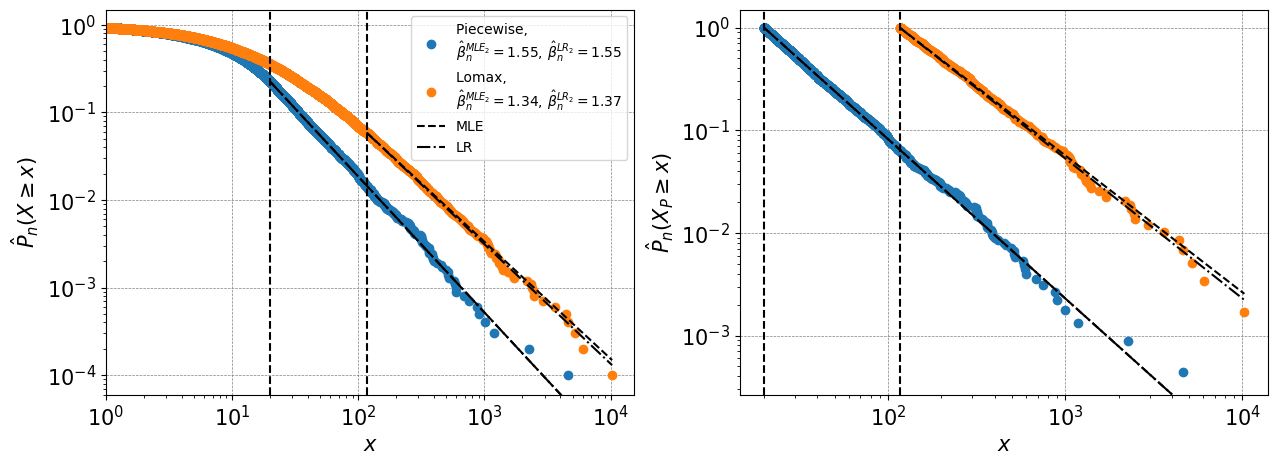

In [12]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.loglog(x1,y1,'o',label=
'Piecewise, \n'+r'$\hat{{\beta}}_n^{{MLE_2}}={}, \,\hat{{\beta}}_n^{{LR_2}}={}$'.format(mle1b,lr1b))
plt.loglog(x2,y2,'o',label=
'Lomax, \n'+r'$\hat{{\beta}}_n^{{MLE_2}}={}, \, \hat{{\beta}}_n^{{LR_2}}={}$'.format(mle2b,lr2b))
plt.loglog(s1_mle_fit[0],s1_mle_fit[1],color='black',linestyle='--',label='MLE')
plt.loglog(s2_mle_fit[0],s2_mle_fit[1],color='black',linestyle='--')
plt.loglog(s1_lr_fit[0],s1_lr_fit[1],color='black',linestyle='-.',label=r'LR')
plt.loglog(s2_lr_fit[0],s2_lr_fit[1],color='black',linestyle='-.')
plt.axvline(x=x_m,color='black',linestyle='--')
plt.axvline(x=x_m1,color='black',linestyle='--')
plt.xlim(1,1.5*m)

y_m=np.min(y1)
plt.ylim(0.6*y_m,1.5)

font_sizes=[15,15,15,15,11]
labels=[r'$x$',r'$\hat{P}_n(X \geq x)$',font_sizes,1]

add_labels(plt,*labels)
plt.legend(ncol=1)

plt.subplot(1,2,2)
plt.loglog(x1_pl,y1_pl,'o',label=
'Piecewise, \n'+r'$\hat{{\beta}}_n^{{MLE_2}}={}, \,\hat{{\beta}}_n^{{LR_2}}={}$'.format(mle1b,lr1b))
plt.loglog(x2_pl,y2_pl,'o',label=
'Lomax, \n'+r'$\hat{{\beta}}_n^{{MLE_2}}={}, \, \hat{{\beta}}_n^{{LR_2}}={}$'.format(mle2b,lr2b))
plt.loglog(s1_pl_mle_fit[0],s1_pl_mle_fit[1],color='black',linestyle='--')
plt.loglog(s2_pl_mle_fit[0],s2_pl_mle_fit[1],color='black',linestyle='--')
plt.loglog(s1_pl_lr_fit[0],s1_pl_lr_fit[1],color='black',linestyle='-.')
plt.loglog(s2_pl_lr_fit[0],s2_pl_lr_fit[1],color='black',linestyle='-.')
plt.axvline(x=x_m,color='black',linestyle='--')
plt.axvline(x=x_m1,color='black',linestyle='--')
y_m=np.min(y1_pl)
plt.ylim(0.6*y_m,1.5)
labels=[r'$x$',r'$\hat{P}_n(X_{P} \geq x)$',font_sizes,0]

add_labels(plt,*labels)


# plt.savefig(direc_save+'piecewise_Lomax',bbox_inches = 'tight')

In [11]:
from scipy.stats import binom

b=2
x_m=10
n=10**4

pareto_sample1=pareto.rvs(b, scale=x_m, size=n)

pareto_sample_s=np.sort(pareto_sample1)

x1,y1=tail(pareto_sample_s)

def pareto_tail(x_m,b,x):
    return (x_m/x)**b

binom_approx=[] 
binom_approx1=[]

for i in range(n):
    b_i=0
    while b_i==0: #truncated binomial support k=1,2,...,n
        x_i=pareto_sample_s[i]
        p=pareto_tail(x_m,b,x_i)
        b_i=binom.rvs(n,p)
        break
    binom_approx.append(1/n*binom.rvs(n,p))

<module 'matplotlib.pyplot' from '/home/samuel/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

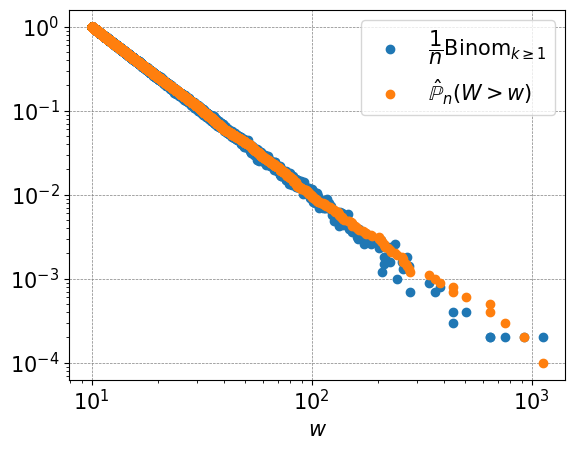

In [13]:
label_arr2=[r'$w$','',font_sizes,1] 
plt.loglog(x1,binom_approx,'o',label=r'$\dfrac{1}{n}$'+r'Binom$_{k\geq1}$')
plt.loglog(x1,y1,'o',label='$\hat{\mathbb{P}}_n(W>w)$')
add_labels(plt,*label_arr2)

In [9]:
beta_lr_est=pl_lr_fit_vec[3]
a=x_m**b
e=y-a*x**(-b)
e1=1+(x_m/x)**(-b)*e
e2=np.log10(e1)
e2m=np.mean(e2)
bias=-np.sum(np.log10(x/x_m)*e2)/np.sum((np.log10(x/x_m))**2)
print(bias)
print(beta_lr_est)
print(b+bias)

0.05558696195203127
2.0555869619520313
2.0555869619520313


In [20]:
from scipy.stats import expon

n=108*2
i=10

def order_stat_exp(n,i):
    s=0

    for j in range(1,i+1):
        z=expon.rvs(scale=1)
        s+=z/(n-j+1)
        
    return s


def log_reg_est(b,n):
    s1=0
    s2=0
    for i in range(1,n+1):
        s1+=order_stat_exp(n,i)*np.log(n/(n-i+1))
        s2+=order_stat_exp(n,i)**2
#         print(i)
    return b*s1/s2
 


In [21]:
%%time
n_l=10**2
n_u=10**3
interv=10
ns=np.arange(n_l,n_u+interv,interv)
b_lin_reg_est=[]

for n in ns:
    b_lin_reg_est.append(log_reg_est(b,n))
    print(n)

100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
CPU times: user 17min 21s, sys: 6.32 s, total: 17min 27s
Wall time: 17min 20s


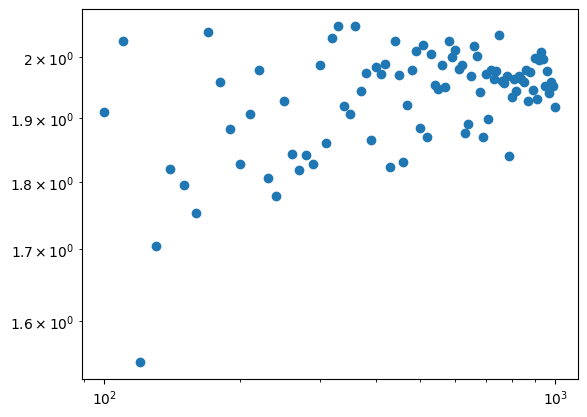

In [22]:
plt.loglog(ns,b_lin_reg_est,'o')

0.06532129410015762


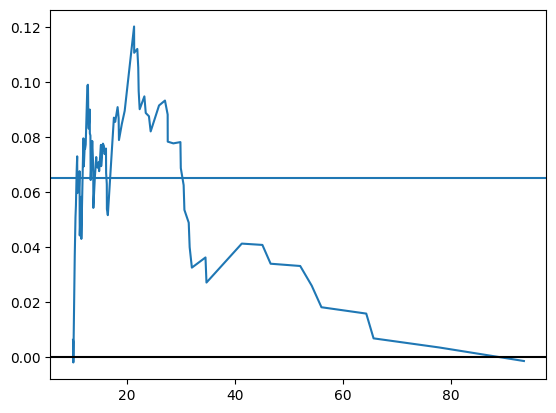

In [35]:
a=x_m**b
e=y-a*x**(-b)
mean=np.mean(e)
print(mean)
plt.plot(x,e)
plt.axhline(mean)
plt.axhline(0, color='black')

In [10]:
# https://stackoverflow.com/questions/4941753/is-there-a-math-ncr-function-in-python
import operator as op
from functools import reduce

def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer // denom

def prob(n,i):
    s=ncr(n,i)*(1-(n+1-i)/n)**i*((n+1-i)/n)**(n-i)
    for j in range(i+1,n+1):
        s+=ncr(n,j)*(1-(n+1-i)/n)**j*((n+1-i)/n)**(n-j)
    return 1-s

In [107]:
%%time
n=10**2

probs=[]

for i in range(1,n+1):
    probs.append(prob(n,i))
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
CPU times: user 56 ms, sys: 4 ms, total: 60 ms
Wall time: 57.7 ms


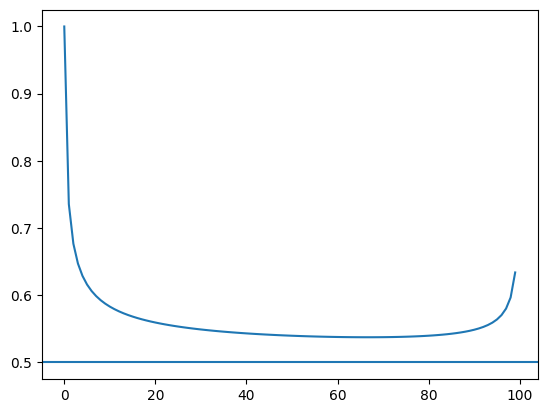

In [108]:
plt.plot(probs)
plt.axhline(0.5)

In [38]:
a=x_m**b
e=y-a*x**(-b)
e1=1+a**(-1)*x**b*e
e2=np.log10(e1)

print(np.mean(e),np.var(e))
print(np.min(e1),np.mean(e1),np.var(e1))
print(np.mean(e2),np.var(e2))

-0.002671070290652813 0.00010475213720080661
0.557445781704494 0.9819740706111355 0.002118688007011827
-0.008431719125875686 0.0004915103383694078


In [76]:
print(np.sum(y),0.5*(n+1),np.sum(a*x**(-b)))

500.5 50.5 15445.607734801939


In [3]:
%%time
b=1.5
x_m=10
n=10**3
n1=10**4
a=x_m**b
eps=0.001
x_i=20

es=[]

for i in range(n1):
    pareto_sample=pareto.rvs(b, scale=x_m, size=n)
    x,y=tail(pareto_sample)
    arr=np.where((x>x_i-eps) & (x<x_i+eps))[0]
    x_s=x[arr]
    y_s=y[arr]
    if len(x_s)>0:
        e=y_s-a*x_s**(-b)
        es=np.concatenate((es,e))


CPU times: user 9.49 s, sys: 192 ms, total: 9.68 s
Wall time: 9.68 s


In [4]:
m=np.min(es)
M=np.max(es)
print(np.mean(es),np.var(es))
print(m,M)

0.0012450272685445084 0.0002286530798789089
-0.04155341260376916 0.04443585716222659


In [5]:
e1s=1+a**-1*x_i**b*es
e2s=np.log10(e1s)
print(np.min(e1s),np.mean(e1s),np.var(e1s))
print(np.mean(e2s),np.var(e2s))

0.8824692006657291 1.0035214688973997 0.0018292246390312712
0.001132452443079753 0.00034248603135278915


In [6]:
from scipy.stats import norm
x_n=np.linspace(m,M,100)
sigma=np.sqrt(1/n*a*x_i**(-b)*(1-a*x_i**(-b)))
print(sigma)
y_n=norm.pdf(x_n,loc=0,scale=sigma)

0.015117982358544866


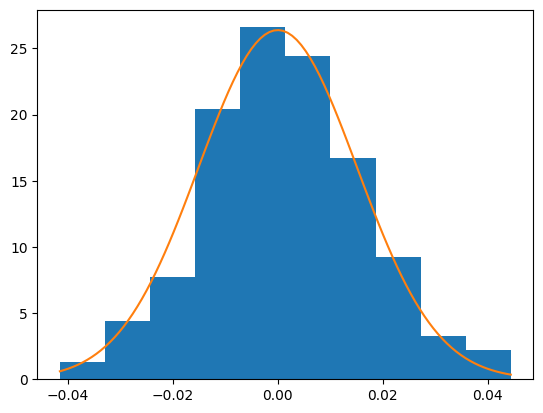

In [7]:
plt.hist(es,density=True)
plt.plot(x_n,y_n)

In [3]:
def lr_mean_est(n,g):
    return np.log((np.exp(1)-(np.log(n))**(g)/n))

In [4]:
%%time
n1=10**3
b=1.5
b0=1
x_m=1
n_l=10**1
n_u=10**3
interv=10
ns=np.arange(n_l,n_u+interv,interv)

g=1.65
# print(ns)
pareto_lr_bs_ns=[]
pareto_lr1_bs_ns=[]
pareto_nlr_bs_ns=[]
pareto_mle_bs_ns=[]
pareto_mle1_bs_ns=[]
for n in ns:
    pareto_lr_bs=[]
    pareto_lr1_bs=[]
    pareto_nlr_bs=[]
    pareto_mle_bs=[]
    pareto_mle1_bs=[]
    for i in range(n1):
        pareto_sample=pareto.rvs(b, scale=x_m, size=n)
        x,y=tail(pareto_sample)
        pl_lr_fit_vec=pl_reg_fit(pareto_sample,x_m)
        pl_nlr_fit_vec=pl_nlr_fit(pareto_sample,b0,x_m)
        pl_mle_fit_vec=get_power_law_fit(pareto_sample,x_m)
        pareto_lr_bs.append(pl_lr_fit_vec[3])
        pareto_lr1_bs.append(pl_lr_fit_vec[3]/lr_mean_est(n,g))
        pareto_nlr_bs.append(pl_nlr_fit_vec[3])
        pareto_mle_bs.append(pl_mle_fit_vec[3])
        pareto_mle1_bs.append((n-1)/n*pl_mle_fit_vec[3])
    pareto_lr_bs_ns.append(pareto_lr_bs)
    pareto_lr1_bs_ns.append(pareto_lr1_bs)
    pareto_nlr_bs_ns.append(pareto_nlr_bs)
    pareto_mle_bs_ns.append(pareto_mle_bs)
    pareto_mle1_bs_ns.append(pareto_mle1_bs)
    print(n)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
CPU times: user 6min 30s, sys: 1.88 s, total: 6min 32s
Wall time: 6min 33s


In [5]:
p_lr1=[]
p_nlr=[]

for i in range(len(ns)):
    b_lr_e=np.abs(np.asarray(pareto_lr_bs_ns[i],float)-b)
    b_lr1_e=np.abs(np.asarray(pareto_lr1_bs_ns[i],float)-b)
    b_nlr_e=np.abs(np.asarray(pareto_nlr_bs_ns[i],float)-b)
    b_mle_e=np.abs(np.asarray(pareto_mle_bs_ns[i],float)-b)
    b_mle1_e=np.abs(np.asarray(pareto_mle1_bs_ns[i],float)-b)

    p_lr1_i=len(np.where(b_lr1_e<=b_mle1_e)[0])/n1
    p_nlr_i=len(np.where(b_nlr_e<=b_mle1_e)[0])/n1
    p_lr1.append(p_lr1_i)
    p_nlr.append(p_nlr_i)

In [6]:
print(np.mean(p_lr1))

0.42275999999999997


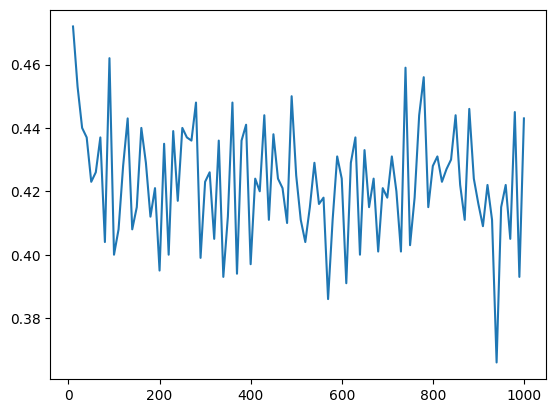

In [7]:
plt.plot(ns,p_lr1)
# plt.plot(ns,p_nlr)
# plt.axhline(0.5)

In [8]:
means_lr=[]
variances_lr=[]
means_lr1=[]
variances_lr1=[]
means_nlr=[]
variances_nlr=[]
means_mle=[]
variances_mle=[]
means_mle1=[]
variances_mle1=[]
for i in range(len(ns)):
    means_lr.append(np.mean(pareto_lr_bs_ns[i]))
    variances_lr.append(np.var(pareto_lr_bs_ns[i],ddof=1)) 
    #https://blogboard.io/blog/knowledge/python-variance/
    means_lr1.append(np.mean(pareto_lr1_bs_ns[i]))
    variances_lr1.append(np.var(pareto_lr1_bs_ns[i],ddof=1))
    means_nlr.append(np.mean(pareto_nlr_bs_ns[i]))
    variances_nlr.append(np.var(pareto_nlr_bs_ns[i],ddof=1))
    means_mle.append(np.mean(pareto_mle_bs_ns[i]))
    variances_mle.append(np.var(pareto_mle_bs_ns[i],ddof=1))
    means_mle1.append(np.mean(pareto_mle1_bs_ns[i]))
    variances_mle1.append(np.var(pareto_mle1_bs_ns[i],ddof=1))

In [9]:
std_lr=np.sqrt(variances_lr)
std_lr1=np.sqrt(variances_lr1)
std_mle1=np.sqrt(variances_mle1)

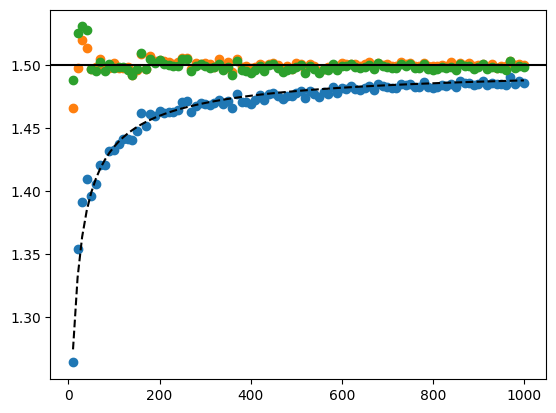

In [10]:
plt.plot(ns,means_lr,'o')
# plt.plot(ns,means_lr1,'o')
# plt.plot(ns,means_nlr,'o')
# plt.plot(ns,means_mle,'o')
plt.plot(ns,means_mle1,'o')
g=1.6
# plt.plot(ns,b*ns/(ns-1),color='black')
# plt.plot(ns,b*np.log((np.exp(1)-np.log(ns)**(0.55)/ns)))
plt.plot(ns,b*lr_mean_est(ns,g),color='black',linestyle='--')
plt.plot(ns,means_lr/lr_mean_est(ns,g),'o')
plt.axhline(b,color='black')

# plt.fill_between(ns,means_lr-std_lr,means_lr+std_lr,alpha=0.3)
# plt.fill_between(ns,means_mle1-std_mle1,means_mle1+std_mle1,alpha=0.3)

In [11]:
g=1.7
v1=variances_lr/lr_mean_est(ns,g)**2

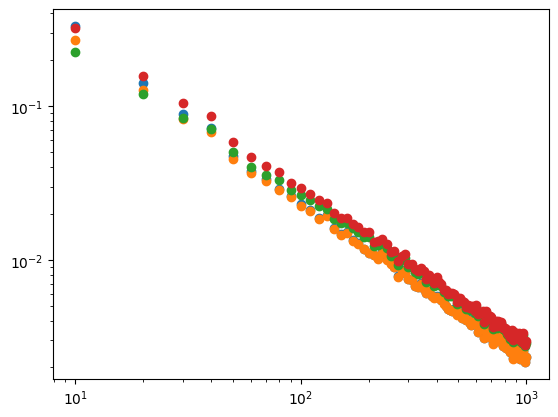

In [12]:
plt.loglog(ns,variances_mle,'o')
plt.loglog(ns,variances_mle1,'o')
plt.loglog(ns,variances_lr,'o')
plt.loglog(ns,v1,'o')

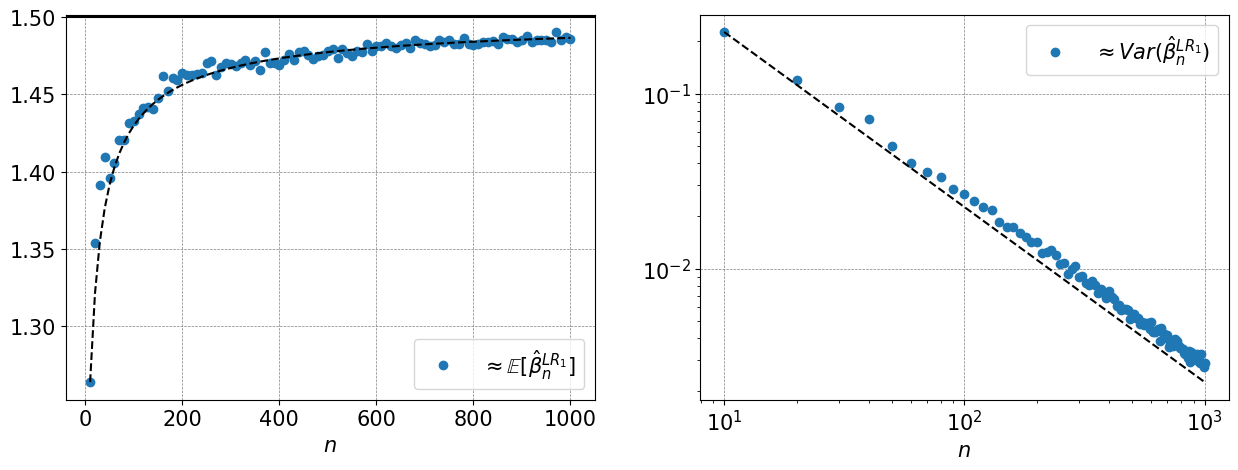

In [20]:
plt.figure(figsize=(15, 5))

g=1.65
plt.subplot(1,2,1)
label=[r'$n$','',font_sizes,1] 
plt.plot(ns,means_lr,'o',label=r'$\approx\mathbb{E}[\hat{\beta}_n^{LR_1}]$')
plt.plot(ns,b*lr_mean_est(ns,g),color='black',linestyle='--')
plt.axhline(b,color='black')
add_labels(plt,*label)

plt.subplot(1,2,2)
label=[r'$n$','',font_sizes,1] 
plt.loglog(ns,variances_lr,'o',label=r'$\approx Var(\hat{\beta}_n^{LR_1})$')
plt.loglog(ns,b**2/(ns),color='black',linestyle='--')
add_labels(plt,*label)

# plt.savefig(direc_save+'beta_fits_lr',bbox_inches = 'tight')

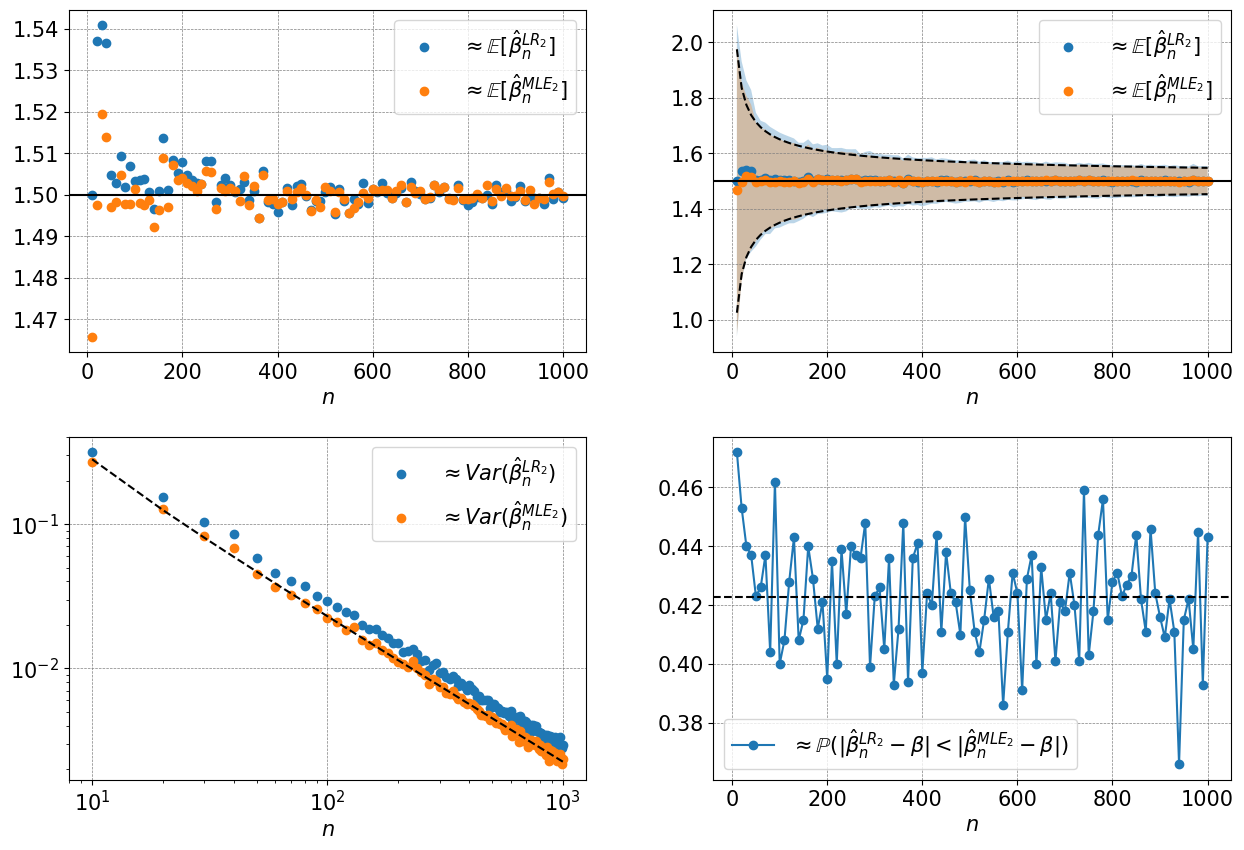

In [21]:
import matplotlib.gridspec as gridspec

plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(20, 20)

plt.subplot(gs[:9, :9])
label=[r'$n$','',font_sizes,1] 
plt.plot(ns,means_lr1,'o',label=r'$\approx\mathbb{E}[\hat{\beta}_n^{LR_2}]$')
plt.plot(ns,means_mle1,'o',label=r'$\approx\mathbb{E}[\hat{\beta}_n^{MLE_2}]$')
# plt.plot(ns,b*np.log((np.exp(1)-(np.log(ns))**(1.6)/ns)),color='black',linestyle='--')
plt.axhline(b,color='black')
add_labels(plt,*label)

plt.subplot(gs[:9, 11:])
label=[r'$n$','',font_sizes,1] 
plt.plot(ns,means_lr1,'o',label=r'$\approx\mathbb{E}[\hat{\beta}_n^{LR_2}]$')
plt.plot(ns,means_mle1,'o',label=r'$\approx\mathbb{E}[\hat{\beta}_n^{MLE_2}]$')
# plt.plot(ns,b*np.log((np.exp(1)-(np.log(ns))**(1.6)/ns)),color='black',linestyle='--')
plt.plot(ns,b+b/np.sqrt(ns),color='black',linestyle='--')
plt.plot(ns,b-b/np.sqrt(ns),color='black',linestyle='--')
plt.axhline(b,color='black')
plt.fill_between(ns,means_lr1-std_lr1,means_lr1+std_lr1,alpha=0.3)
plt.fill_between(ns,means_mle1-std_mle1,means_mle1+std_mle1,alpha=0.3)
add_labels(plt,*label)

plt.subplot(gs[11:, :9])
label=[r'$n$','',font_sizes,1] 
plt.loglog(ns,variances_lr1,'o',label=r'$\approx Var(\hat{\beta}_n^{LR_2})$')
plt.loglog(ns,variances_mle1,'o',label=r'$\approx Var(\hat{\beta}_n^{MLE_2})$')
plt.loglog(ns,b**2/(ns-2),color='black',linestyle='--')
add_labels(plt,*label)

plt.subplot(gs[11:, 11:])
label=[r'$n$','',font_sizes,1] 
plt.plot(ns,p_lr1,'-o',label=\
r'$\approx \mathbb{P}(|\hat{\beta}_n^{LR_2}-\beta| < |\hat{\beta}_n^{MLE_2}-\beta|)$')
plt.axhline(np.mean(p_lr1),color='black',linestyle='--')
add_labels(plt,*label)

# plt.savefig(direc_save+'beta_fits',bbox_inches = 'tight')

In [36]:
%%time
n1=10**3
b=1.5
b0=1
x_m=1
n_l=2
n_u=10**2
interv=1
ns_a=np.arange(n_l,n_u+interv,interv)

g=1.65
# print(ns)
pareto_lr_bs_ns_a=[]
# pareto_lr1_bs_ns=[]
# pareto_nlr_bs_ns=[]
# pareto_mle_bs_ns=[]
# pareto_mle1_bs_ns=[]
for n in ns_a:
    pareto_lr_bs_a=[]
#     pareto_lr1_bs=[]
#     pareto_nlr_bs=[]
#     pareto_mle_bs=[]
#     pareto_mle1_bs=[]
    for i in range(n1):
        pareto_sample=pareto.rvs(b, scale=x_m, size=n)
        x,y=tail(pareto_sample)
        pl_lr_fit_vec=pl_reg_fit(pareto_sample,x_m)
#         pl_nlr_fit_vec=pl_nlr_fit(pareto_sample,b0,x_m)
#         pl_mle_fit_vec=get_power_law_fit(pareto_sample,x_m)
        pareto_lr_bs_a.append(pl_lr_fit_vec[3])
#         pareto_lr1_bs.append(pl_lr_fit_vec[3]/lr_mean_est(n,g))
#         pareto_nlr_bs.append(pl_nlr_fit_vec[3])
#         pareto_mle_bs.append(pl_mle_fit_vec[3])
#         pareto_mle1_bs.append((n-1)/n*pl_mle_fit_vec[3])
    pareto_lr_bs_ns_a.append(pareto_lr_bs_a)
#     pareto_lr1_bs_ns.append(pareto_lr1_bs)
#     pareto_nlr_bs_ns.append(pareto_nlr_bs)
#     pareto_mle_bs_ns.append(pareto_mle_bs)
#     pareto_mle1_bs_ns.append(pareto_mle1_bs)
    print(n)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
CPU times: user 21.1 s, sys: 60 ms, total: 21.2 s
Wall time: 21.1 s


In [37]:
means_lr_a=[]
variances_lr_a=[]
# means_lr1=[]
# variances_lr1=[]
# means_nlr=[]
# variances_nlr=[]
# means_mle=[]
# variances_mle=[]
# means_mle1=[]
# variances_mle1=[]
for i in range(len(ns)):
    means_lr_a.append(np.mean(pareto_lr_bs_ns_a[i]))
    variances_lr_a.append(np.var(pareto_lr_bs_ns_a[i]))
#     means_lr1.append(np.mean(pareto_lr1_bs_ns[i]))
#     variances_lr1.append(np.var(pareto_lr1_bs_ns[i]))
#     means_nlr.append(np.mean(pareto_nlr_bs_ns[i]))
#     variances_nlr.append(np.var(pareto_nlr_bs_ns[i]))
#     means_mle.append(np.mean(pareto_mle_bs_ns[i]))
#     variances_mle.append(np.var(pareto_mle_bs_ns[i]))
#     means_mle1.append(np.mean(pareto_mle1_bs_ns[i]))
#     variances_mle1.append(np.var(pareto_mle1_bs_ns[i]))

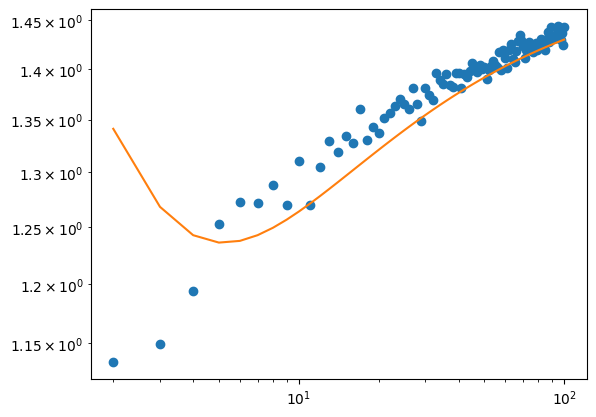

In [78]:
plt.loglog(ns_a,means_lr_a,'o')
plt.loglog(ns_a,b*np.log((np.exp(1)-np.log(ns_a)**(1.65)/ns_a)))
# plt.loglog(ns_a,b*np.log((np.exp(1)-np.log(ns_a)**(0.6)/ns_a**0.65)))

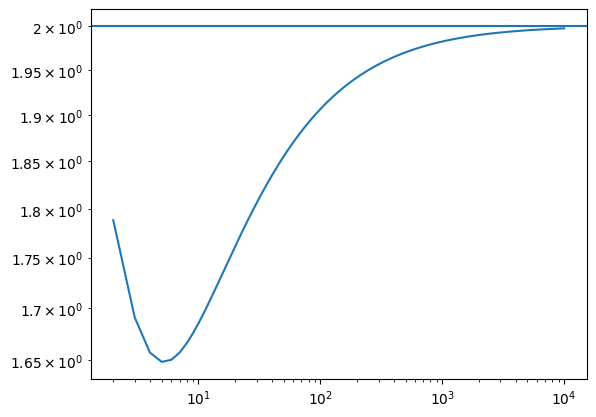

In [8]:
x=np.arange(2,10**4+1,1)
plt.axhline(b)
plt.loglog(x,b*np.log((np.exp(1)-np.log(x)**(1.65)/x)))